<a href="https://colab.research.google.com/github/depshar/MLProject/blob/master/3250foundationofdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3250 - Foundations of Data Science

Team:
  *   Deepak Sharma
  *   Fei Ma
  *   Howell Wang
  *   Jitixa Mistry
  *   Michael Nandlall
  *   Ravi Danda

## Project Introduction

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this Kaggle(Refer citation 1) competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

## Original Project Scope / Problem Statement

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

##3250 - Project Objective



**Original Kaggle Objective**

Evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

 **3250 Project Objective**

*   Data Analysis of different features
*   Data Cleaning
*   Feature Engineering
*   Using Linear Regression to create a model to predict Sale Prices and calculate RMSE 

## Methodology



*Use Python Linear Regression Package*

## Challenges

1. Too many features for linear regression
2. Data Analysis of such a large dataset can be challenging
3. Requires data to be clean

## Approach


1.	Group the features in logical sets and analyze each set to look for correlation with House Price
2.	Identify the top features which impact the House Price as preparation for Model
3.	Building model using the features identified above
4.	Calculate the RMSE

## External Sources



Citation : 

1. Kaggle - https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description

2. Github : https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

##Importing Libraries and loading data

We will first start with importing relavant libraties, loading data an checking the dimensions of data available

In [0]:
import numpy as np 
import pandas as pd 
import os
from pandas import DataFrame, Series
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

Loading Data and looking at data quality

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [0]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [0]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [0]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


## Data Clean Up & Analysis

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [0]:
#There are a few categorical features where NA has a meaning. Replacing those NA values to None

null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_has_meaning:
    train[i].fillna("None", inplace=True)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

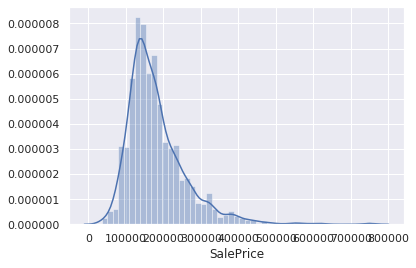

In [0]:
#Lets look at the SalePrice to start with
sns.distplot(train['SalePrice']);

In [0]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


The prices are skewed right and some outliers lies above ~500,000.

Using the heatmap, checking which are the parameters which are strongly correlated to SalePrice

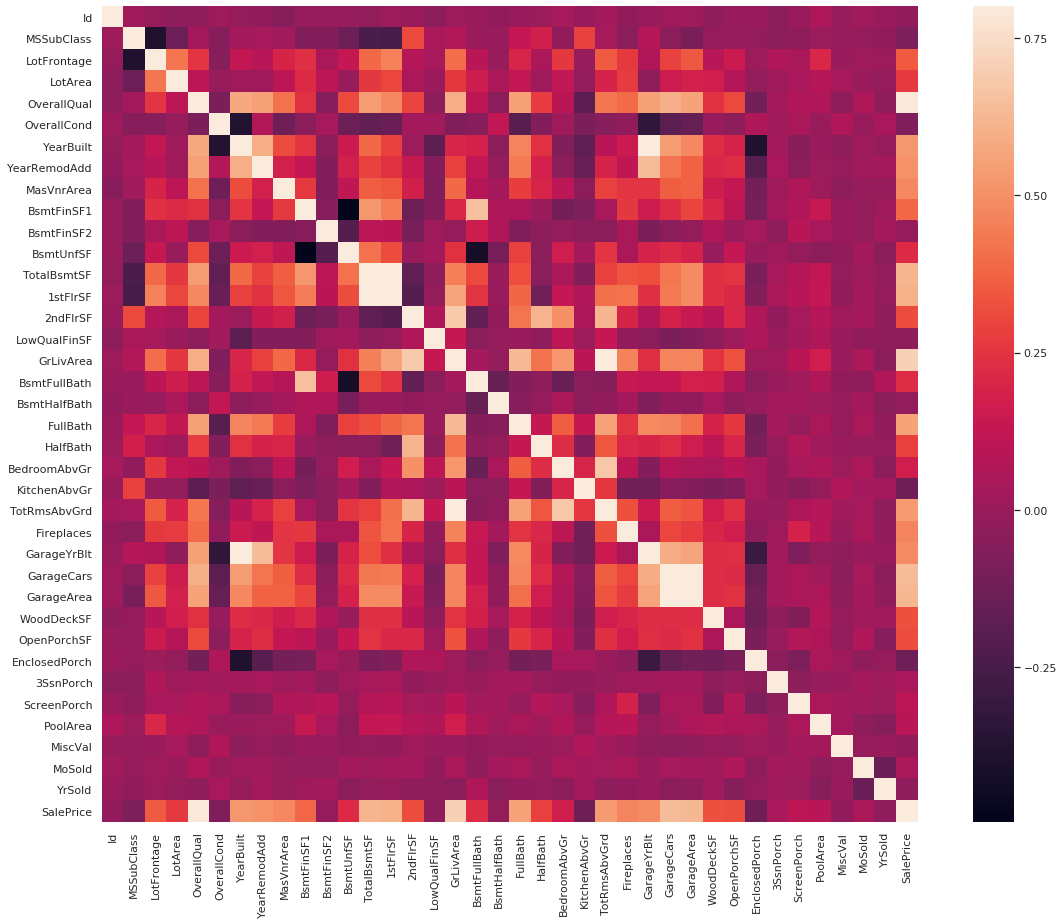

In [0]:
#Correlation matrix (heatmap style). This is to check correlation between all the variables in data set

corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, vmax=.8, square=True);

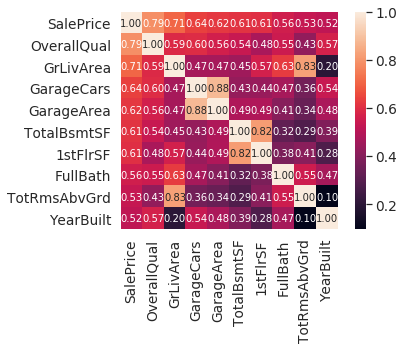

In [0]:
#Taking a deep dive into columns. Correlation matrix showing the top 10 features that are highly correlated
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

The above heatmap shows that Overall Quality, Ground Living Area, number of Garage & TotalBsmtSF are highly correlated to the sale prices


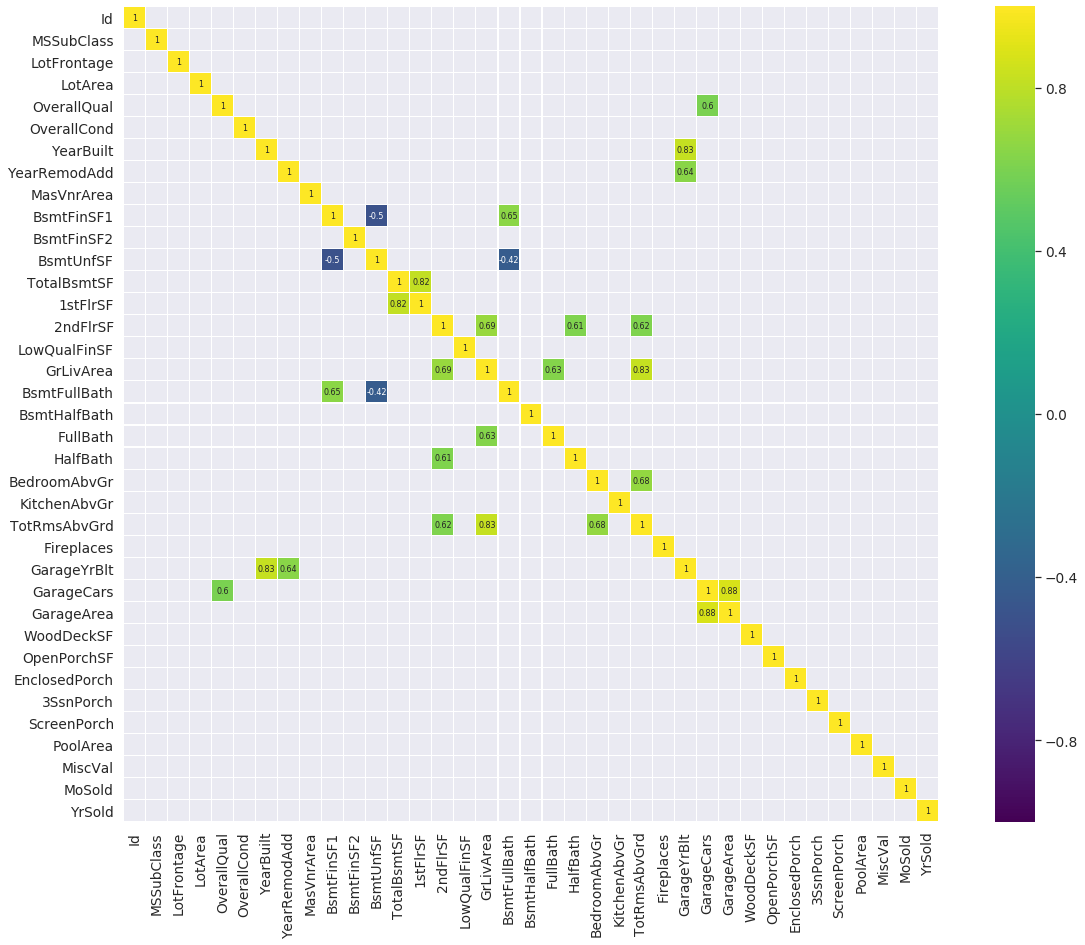

In [0]:
#Now Looking at feature to feature correlation --> i.e. which other features are correlated to each other (and not the Saleprice)
corr = train.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(20, 15))

sns.heatmap(corr[(corr >= 0.6) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

From above plot we can see that there are quite a few parameters which are correlated. 

GrLivingArea is highly correlated to TotRmsAbvGrd --> The larger the Ground living area, most likey will have more number of rooms
Similarly, Bedrooms above ground and Full Bath are also highly correlated with GrLivingArea

Similarly, TotalBsmtSF is highly correlated to 1stFlrSF


YrBuilt Vs GarageYrBlt --> In most cases the garage will be built along with the house. Logically seems to be highly correlated



Since it is a large dataset we grouped the dataset into a few logical sets for analysis for deep dive

```
The data is logically grouped in following sections and are analyzed.
* Overall analysis
* Garage
* Lot Size, reno, age
* Roof, pool, fence, etc
* Price and SQ ft
* Basement,
* Bedroom, bath and kitchen 
```


##Garage Data Analysis

In [0]:
# this code to choose only columns that allow to analysis data that focused on important variables related to housing values 
Cleandata1 = train[['YearBuilt', 'Neighborhood', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'GarageArea', 'YrSold', 'SalePrice']]
Cleandata1.head(4)

,YearBuilt,Neighborhood,FullBath,HalfBath,BedroomAbvGr,GarageArea,YrSold,SalePrice
0,2003,CollgCr,2,1,3,548,2008,208500
1,1976,Veenker,2,0,3,460,2007,181500
2,2001,CollgCr,2,1,3,608,2008,223500
3,1915,Crawfor,1,0,3,642,2006,140000


In [0]:

# delete rows with 0 'HalfBath'
Cleandata2 = Cleandata1.loc[Cleandata1['HalfBath'] !=0]
Cleandata2.head(6)


,YearBuilt,Neighborhood,FullBath,HalfBath,BedroomAbvGr,GarageArea,YrSold,SalePrice
0,2003,CollgCr,2,1,3,548,2008,208500
2,2001,CollgCr,2,1,3,608,2008,223500
4,2000,NoRidge,2,1,4,836,2008,250000
5,1993,Mitchel,1,1,1,480,2009,143000
7,1973,NWAmes,2,1,3,484,2009,200000
14,1960,NAmes,1,1,2,352,2008,157000


In [0]:
# Create a dataframe with attributes related to garage area data
Garagedata1 = train[['SalePrice','GarageType', 'YearBuilt','GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual','GarageCond']]
Garagedata1.head(6)

,SalePrice,GarageType,YearBuilt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,208500,Attchd,2003,RFn,2,548,TA,TA
1,181500,Attchd,1976,RFn,2,460,TA,TA
2,223500,Attchd,2001,RFn,2,608,TA,TA
3,140000,Detchd,1915,Unf,3,642,TA,TA
4,250000,Attchd,2000,RFn,3,836,TA,TA
5,143000,Attchd,1993,Unf,2,480,TA,TA


In [0]:
# create a dataframe with two attributes to find correlation between garagearea abd house value
Garageareadata = train[[ 'GarageArea', 'SalePrice']]
Garageareadata.head()

,GarageArea,SalePrice
0,548,208500
1,460,181500
2,608,223500
3,642,140000
4,836,250000


In [0]:
# sort by garage size ascending 
Garageareadata.sort_values(by=['GarageArea', 'SalePrice'])

,GarageArea,SalePrice
495,0,34900
968,0,37900
533,0,39300
710,0,52000
1337,0,52500
...,...,...
825,1220,385000
1061,1248,81000
1190,1356,168000
581,1390,253293


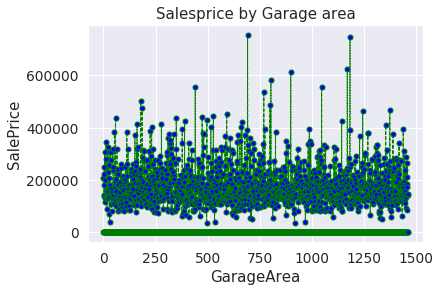

In [0]:
# plot shows the slaes price by garage area
import matplotlib.pyplot as plt 
plt.plot(Garageareadata, color='green', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='blue', markersize=5) 

plt.xlabel('GarageArea') 
# naming the y axis 
plt.ylabel('SalePrice') 
  
# giving a title to my graph 
plt.title('Salesprice by Garage area') 
  
# function to show the plot 
plt.show() 

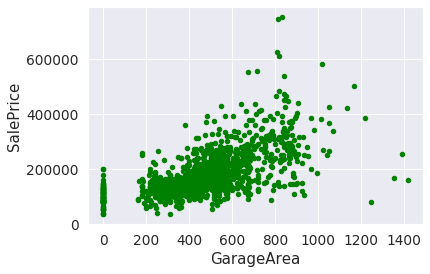

In [0]:
# scatter plot to see maximum house was build within which square feet of garage areas
Garageareadata.plot.scatter(x='GarageArea',y='SalePrice',c='green')

In [0]:
# created bins for garage areas
bins = [100,200,400,600,800,1000,1200,1400,1600]
Groupgragearea = Cleandata2.groupby(pd.cut(Cleandata2['GarageArea'], bins=bins)).size()
Groupgragearea

GarageArea
(100, 200]        9
(200, 400]      103
(400, 600]      277
(600, 800]       89
(800, 1000]      49
(1000, 1200]      8
(1200, 1400]      1
(1400, 1600]      1
dtype: int64

In [0]:
#created bins for house value
nbins = [50000, 100000, 150000, 200000, 250000, 300000,350000,400000]
Groupsalesprice = Cleandata2.groupby(pd.cut(Cleandata2['SalePrice'], bins=nbins)).size()
Groupsalesprice


SalePrice
(50000, 100000]      14
(100000, 150000]     94
(150000, 200000]    214
(200000, 250000]    104
(250000, 300000]     51
(300000, 350000]     35
(350000, 400000]     12
dtype: int64

In [0]:
# maximum area of garage and maximum value of house
Garageareadata.max()

GarageArea      1418
SalePrice     755000
dtype: int64

In [0]:
# group by types of garages attch or detach
groupbytypeofgarage = Garagedata1.groupby(['GarageType']).apply(lambda x: (x.groupby('SalePrice').sum()))
groupbytypeofgarage.head(6)

YearBuilt  GarageCars  GarageArea
GarageType SalePrice                                   
2Types     87000           1900           3         779
           145000          1949           3         871
           150000          1958           2         750
           168000          1961           4        1356
           171000          1988           3         766
           186700          1963           3         995

In [0]:
# mean value of types of garage
groupbytypeofgarage.mean()

YearBuilt    3212.110
GarageCars      2.879
GarageArea    770.704
dtype: float64

In [0]:
# standard deviation of types of garage
groupbytypeofgarage.std()

YearBuilt    2745.975
GarageCars      2.707
GarageArea    725.690
dtype: float64

In [0]:
# correlation of types of garage and sale price
groupbytypeofgarage.corr()

,YearBuilt,GarageCars,GarageArea
YearBuilt,1.000,0.914,0.906
GarageCars,0.914,1.000,0.982
GarageArea,0.906,0.982,1.000


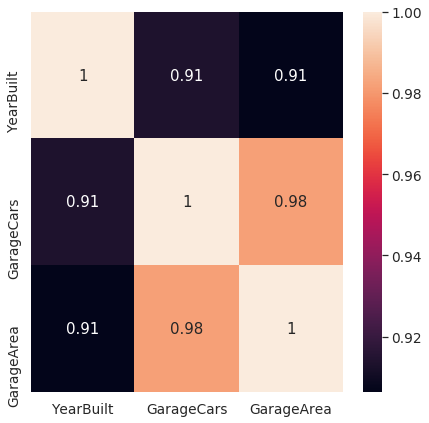

In [0]:
# correlation plot shows how garage area, numbers of cars garage can fit(0,1,2,3)and year built 
# High correlation between house build year, garage area and types of garage
plt.figure(figsize=(7, 7))
sns.heatmap(groupbytypeofgarage.corr(), annot=True)

In [0]:
# create a dataframe to select attributes of numbers of cars fit in the garage and house values
numbersofcars = Garagedata1[['GarageCars', 'SalePrice']]
numbersofcars.head(4)

,GarageCars,SalePrice
0,2,208500
1,2,181500
2,2,223500
3,3,140000


In [0]:
# mean value of types of garage and sale price
numbersofcars.mean()

GarageCars        1.767
SalePrice    180921.196
dtype: float64

In [0]:
# standard deviation of garage type and sale price
numbersofcars.std()

GarageCars       0.747
SalePrice    79442.503
dtype: float64

In [0]:
# correlation between numbers of cars fit into garage and sale price of houses
numbersofcars.corr()

,GarageCars,SalePrice
GarageCars,1.000,0.640
SalePrice,0.640,1.000


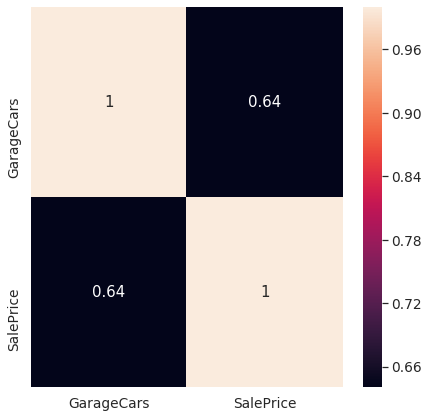

In [0]:
# correlation plot for garage types how many cars fit into garage and sale price of houses
# high correlation between these two attributes 
plt.figure(figsize=(7, 7))
sns.heatmap(numbersofcars.corr(), annot=True)

##Square Footage and age of home

In [0]:
# convert all categorical features
# Example : Type of a rock: igneous, sedimentary and metamorphic

In [0]:
# Howell data initial
sqft_ds = train[['YearBuilt', 'YrSold', 'MoSold','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'SalePrice']].sort_index()
sqft_ds['PricePerSqft'] = sqft_ds['SalePrice'] / sqft_ds['GrLivArea']

sqft_ds


,YearBuilt,YrSold,MoSold,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,SalePrice,PricePerSqft
0,2003,2008,2,856,856,854,1710,208500,121.930
1,1976,2007,5,1262,1262,0,1262,181500,143.819
2,2001,2008,9,920,920,866,1786,223500,125.140
3,1915,2006,2,756,961,756,1717,140000,81.538
4,2000,2008,12,1145,1145,1053,2198,250000,113.740
...,...,...,...,...,...,...,...,...,...
1455,1999,2007,8,953,953,694,1647,175000,106.254
1456,1978,2010,2,1542,2073,0,2073,210000,101.302
1457,1941,2010,5,1152,1188,1152,2340,266500,113.889
1458,1950,2010,4,1078,1078,0,1078,142125,131.841


Skewness : 1.8828757597682129
Kurtosis : 6.536281860064529


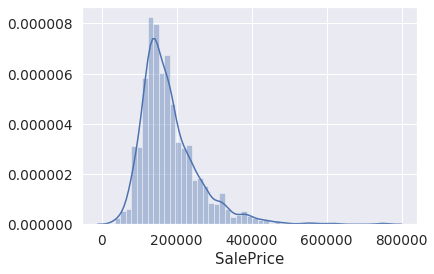

In [0]:
# Plot Sale Price
# Understanding the Sale Price data. We have a positive skewness

sns.distplot(sqft_ds['SalePrice'])
print("Skewness : {}".format(sqft_ds['SalePrice'].skew()))
print("Kurtosis : {}".format(sqft_ds['SalePrice'].kurt()))

Skewness : 1.3665603560164552
Kurtosis : 4.895120580693174


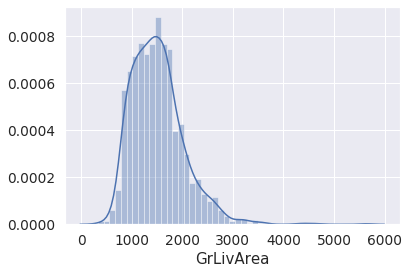

In [0]:
# Understanding the Ground living area data. Most of the houses are 1000-2000 sq

sns.distplot(sqft_ds['GrLivArea'])
print("Skewness : {}".format(sqft_ds['GrLivArea'].skew()))
print("Kurtosis : {}".format(sqft_ds['GrLivArea'].kurt()))

Text(0, 0.5, 'Sale Price')

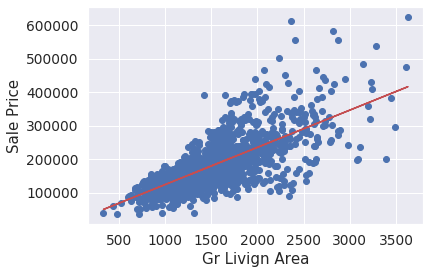

In [0]:
# price vs Ground Living Area
# bigger house (more gound living space) is priced higher

# drop outlier values
sqft_remove_outlier = sqft_ds[sqft_ds["GrLivArea"] < 4000]

Y = sqft_remove_outlier["SalePrice"]
X = sqft_remove_outlier["GrLivArea"].values.reshape(-1, 1)
model = sklearn.linear_model.LinearRegression().fit(X, Y)

plt.scatter(x=sqft_remove_outlier["GrLivArea"], y=sqft_remove_outlier["SalePrice"])
plt.plot(X, model.predict(X), 'r-')
plt.xlabel("Gr Livign Area")
plt.ylabel('Sale Price')


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


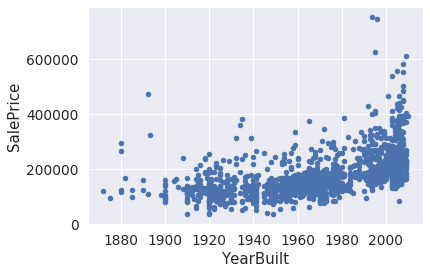

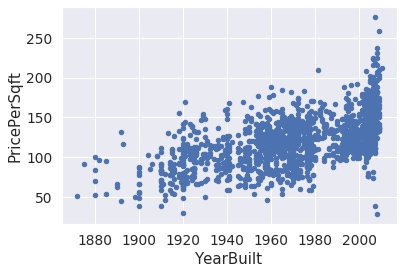

In [0]:
# Year Built vs PricePerSqft
# Houses built more recently is sold for higher per squre feet and higher price overall

sqft_ds.plot.scatter(x='YearBuilt', y='SalePrice')
sqft_ds.plot.scatter(x='YearBuilt', y='PricePerSqft')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


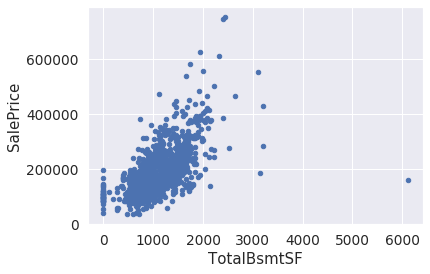

In [0]:
# Year Built vs PricePerSqft
# Houses with bigger basement size is sold for higher price

sqft_ds.plot.scatter(x='TotalBsmtSF', y='SalePrice')

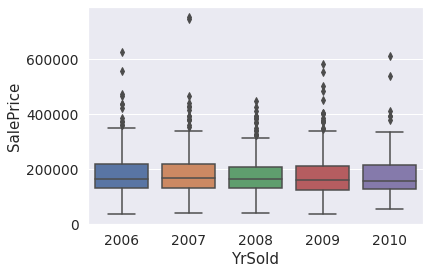

In [0]:
#Year Sold doens't have much influence in sale price

sns.boxplot(x='YrSold', y="SalePrice", data=sqft_ds)

##Kitchen, Bedroom, Bathroom analysis

KitchenQual values need to be converted to integer values so that correlation coefficients can be calculated.

In [0]:
#map KitchenQual values to integer values
train['KitchenQual'] = train['KitchenQual'].map( {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd' : 3, 'Ex' : 4} ).astype(int)

Divide values in BsmtHalfBath attribute by 2, so that values truly represent half of a bathroom. Once that is done, create new attribute called BsmtTotalBath, which is the sum of BsmtHalfBath and BsmtFullBath. This will give a better representation of how bathrooms in basement affect price

In [0]:
train['BsmtHalfBath'] = train['BsmtHalfBath']/2

train['BsmtTotalBath'] = train['BsmtFullBath'] + train['BsmtHalfBath']

Divide values in HalfBath attribute by 2, so that values truly represent half of a bathroom. Once that is done, create new attribute called AboveGradeTotalBath, which is the sum of HalfBath and FullBath. This will give a better representation of how bathrooms that are above grade affect price

In [0]:
train['HalfBath'] = train['HalfBath']/2

train['AboveGradeTotalBath'] = train['FullBath'] + train['HalfBath']

Create a new dataframe with subset of attributes, focusing on bathrooms, bedrooms and kitchen. This will be used for analysis on how these specific attributes affect the final sales price

In [0]:
train_bedbathkitchen = train[['SalePrice', 'BsmtTotalBath', 'AboveGradeTotalBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd']].copy()

Generate heatmap showing correlation coefficients between SalePrice and attributes. The correlation coefficient will show if each of the attributes has an impact on final sales price (either positively or negatively)

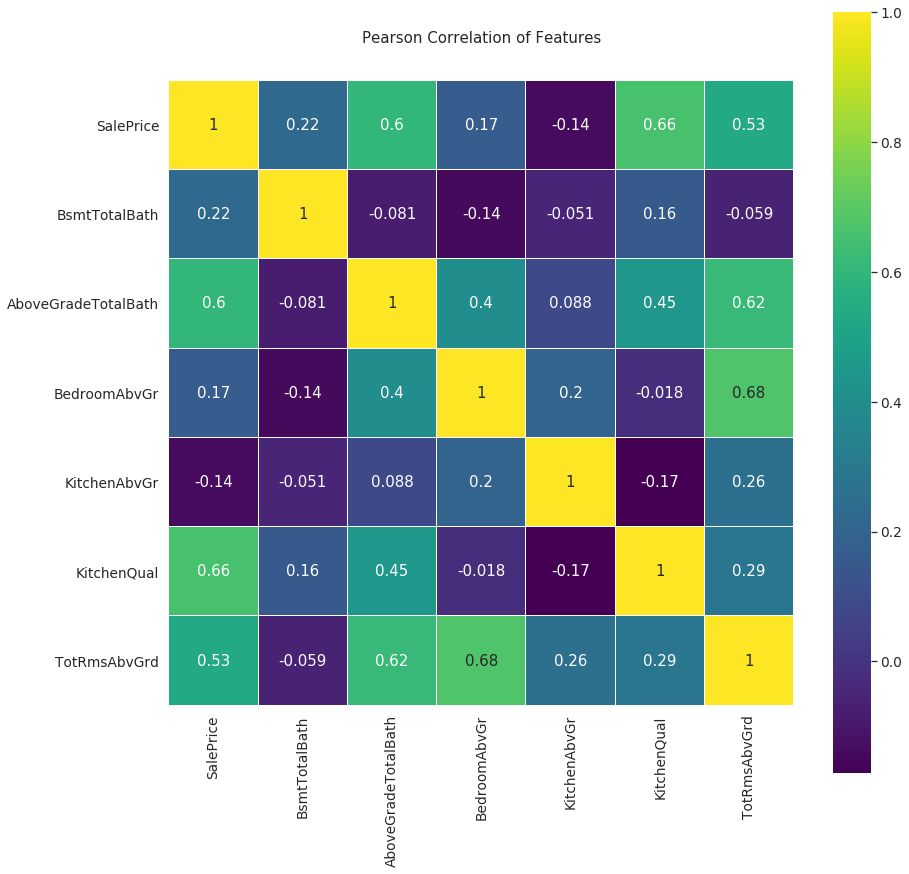

In [0]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,14))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_bedbathkitchen.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

The following calculations show count, mean and median of Sales Price, grouped by each of the attributes. This shows, in terms of sales price, how much of an impact each attribute has

In [0]:
train_bedbathkitchen[['BsmtTotalBath', 'SalePrice']].groupby(['BsmtTotalBath'], as_index=False).agg(['count', 'mean', 'median'])

SalePrice                   
                  count       mean  median
BsmtTotalBath                             
0.000               783 165093.197  153900
0.500                71 170378.169  158000
1.000               581 202089.806  177500
1.500                 9 221222.222  235000
2.000                15 213063.067  188000
3.000                 1 179000.000  179000

In [0]:
train_bedbathkitchen[['AboveGradeTotalBath', 'SalePrice']].groupby(['AboveGradeTotalBath'], as_index=False).agg(['count', 'mean', 'median'])

SalePrice                      
                        count       mean     median
AboveGradeTotalBath                                
0.000                       3 108103.667 144000.000
0.500                       3 235333.333 260000.000
1.000                     469 124843.243 127000.000
1.500                     180 160091.678 152750.000
2.000                     433 200195.464 186000.000
2.500                     334 229859.162 212000.000
3.000                      20 238913.450 200562.000
3.500                      18 417265.944 361821.500

In [0]:
train_bedbathkitchen[['BedroomAbvGr', 'SalePrice']].groupby(['BedroomAbvGr'], as_index=False).agg(['count', 'mean', 'median'])

SalePrice                   
                 count       mean  median
BedroomAbvGr                             
0                    6 221493.167  202500
1                   50 173162.420  145250
2                  358 158197.659  137250
3                  804 181056.871  169945
4                  213 220421.254  193500
5                   21 180819.048  161500
6                    7 143779.000  141000
8                    1 200000.000  200000

In [0]:
train_bedbathkitchen[['KitchenAbvGr', 'SalePrice']].groupby(['KitchenAbvGr'], as_index=False).agg(['count', 'mean', 'median'])

SalePrice                   
                 count       mean  median
KitchenAbvGr                             
0                    1 127500.000  127500
1                 1392 183388.790  165550
2                   65 131096.154  133900
3                    2 109500.000  109500

In [0]:
train_bedbathkitchen[['KitchenQual', 'SalePrice']].groupby(['KitchenQual'], as_index=False).agg(['count', 'mean', 'median'])

SalePrice                   
                count       mean  median
KitchenQual                             
1                  39 105565.205  115000
2                 735 139962.512  137000
3                 586 212116.024  201400
4                 100 328554.670  316750

In [0]:
train_bedbathkitchen[['TotRmsAbvGrd', 'SalePrice']].groupby(['TotRmsAbvGrd'], as_index=False).agg(['count', 'mean', 'median'])

SalePrice                      
                 count       mean     median
TotRmsAbvGrd                                
2                    1  39300.000  39300.000
3                   17 111217.647 100000.000
4                   97 122844.629 120500.000
5                  275 141550.749 130250.000
6                  402 161303.296 155000.000
7                  329 196666.784 184100.000
8                  187 213427.529 200000.000
9                   75 252988.173 252000.000
10                  47 296279.170 285000.000
11                  18 318022.000 311738.500
12                  11 280971.455 200000.000
14                   1 200000.000 200000.000

The following code generates a scatter plot for each attribute versus Sales Price, to visualize the trend.

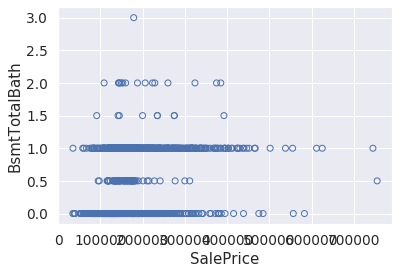

In [0]:
plt.scatter(train_bedbathkitchen.SalePrice, train_bedbathkitchen.BsmtTotalBath,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1.0 )
plt.xlabel('SalePrice')
plt.ylabel('BsmtTotalBath')
None

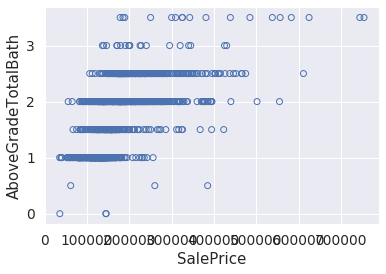

In [0]:
plt.scatter(train_bedbathkitchen.SalePrice, train_bedbathkitchen.AboveGradeTotalBath,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1.0 )
plt.xlabel('SalePrice')
plt.ylabel('AboveGradeTotalBath')
None

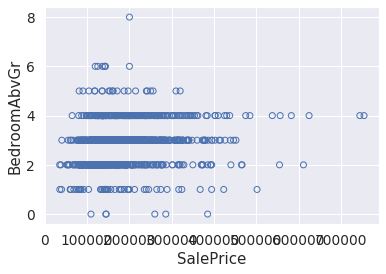

In [0]:
plt.scatter(train_bedbathkitchen.SalePrice, train_bedbathkitchen.BedroomAbvGr,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1.0 )
plt.xlabel('SalePrice')
plt.ylabel('BedroomAbvGr')
None

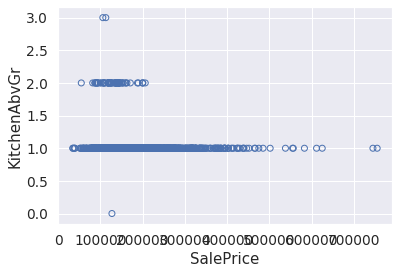

In [0]:
plt.scatter(train_bedbathkitchen.SalePrice, train_bedbathkitchen.KitchenAbvGr,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1.0 )
plt.xlabel('SalePrice')
plt.ylabel('KitchenAbvGr')
None

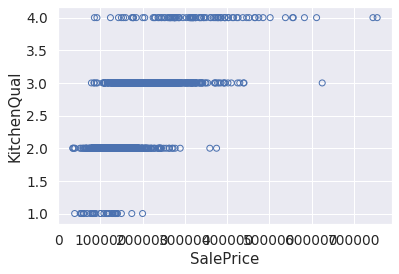

In [0]:
plt.scatter(train_bedbathkitchen.SalePrice, train_bedbathkitchen.KitchenQual,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1.0 )
plt.xlabel('SalePrice')
plt.ylabel('KitchenQual')
None

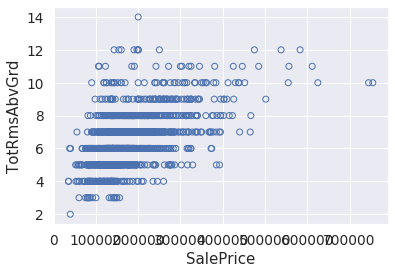

In [0]:
plt.scatter(train_bedbathkitchen.SalePrice, train_bedbathkitchen.TotRmsAbvGrd,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1.0 )
plt.xlabel('SalePrice')
plt.ylabel('TotRmsAbvGrd')
None

##Basement Analysis

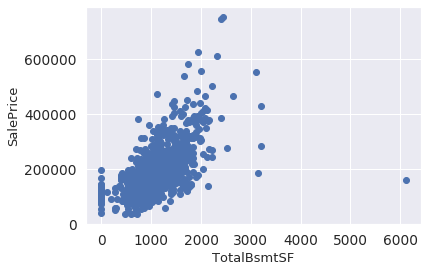

In [0]:
# Hypothisis is that Sale Price will be positively correlated to Basement Sq. footage. Plotting a scatter plot to validate the assumption

fig, ax = plt.subplots()
ax.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

In [0]:
## Getting only Basement features

trainbsmt = train[['SalePrice', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]
trainbsmt.head()

,SalePrice,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,208500,Gd,TA,No,GLQ,706,Unf,0,150,856
1,181500,Gd,TA,Gd,ALQ,978,Unf,0,284,1262
2,223500,Gd,TA,Mn,GLQ,486,Unf,0,434,920
3,140000,TA,Gd,No,ALQ,216,Unf,0,540,756
4,250000,Gd,TA,Av,GLQ,655,Unf,0,490,1145


In [0]:
trainbsmt['BsmtQual'].unique()


array(['Gd', 'TA', 'Ex', 'None', 'Fa'], dtype=object)

In [0]:
#map BsmtQual values to integer values
trainbsmt['BsmtQual'] = trainbsmt['BsmtQual'].map( {'None': 0,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd' : 4, 'Ex' : 5} ).astype(int)
trainbsmt['BsmtCond'] = trainbsmt['BsmtCond'].map( {'None': 0,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd' : 4, 'Ex' : 5} ).astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
trainbsmt['BsmtExposure'].unique()
trainbsmt['BsmtExposure'] = trainbsmt['BsmtExposure'].map( {'None': 0,'No': 0, 'Av': 1, 'Mn': 2, 'Gd' : 3} ).astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
trainbsmt['BsmtFinType1'].unique()
trainbsmt['BsmtFinType1'] = trainbsmt['BsmtFinType1'].map( {'None': 0,'Unf': 1, 'LwQ': 2, 'Rec': 3,'BLQ' :4, 'ALQ' : 5, 'GLQ' : 6} ).astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
trainbsmt.head()

,SalePrice,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,208500,4,3,0,6,706,Unf,0,150,856
1,181500,4,3,3,5,978,Unf,0,284,1262
2,223500,4,3,2,6,486,Unf,0,434,920
3,140000,3,4,0,5,216,Unf,0,540,756
4,250000,4,3,1,6,655,Unf,0,490,1145


In [0]:
trainbsmt['BsmtFinType2'].unique()
trainbsmt['BsmtFinType2'] = trainbsmt['BsmtFinType2'].map( {'None': 0,'Unf': 1, 'LwQ': 2, 'Rec': 3,'BLQ' :4, 'ALQ' : 5, 'GLQ' : 6} ).astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
trainbsmt.head()

,SalePrice,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,208500,4,3,0,6,706,1,0,150,856
1,181500,4,3,3,5,978,1,0,284,1262
2,223500,4,3,2,6,486,1,0,434,920
3,140000,3,4,0,5,216,1,0,540,756
4,250000,4,3,1,6,655,1,0,490,1145


In [0]:
trainbsmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
SalePrice       1460 non-null int64
BsmtQual        1460 non-null int64
BsmtCond        1460 non-null int64
BsmtExposure    1460 non-null int64
BsmtFinType1    1460 non-null int64
BsmtFinSF1      1460 non-null int64
BsmtFinType2    1460 non-null int64
BsmtFinSF2      1460 non-null int64
BsmtUnfSF       1460 non-null int64
TotalBsmtSF     1460 non-null int64
dtypes: int64(10)
memory usage: 114.2 KB


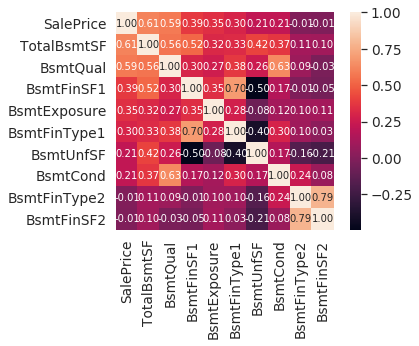

In [0]:
#Heatmap for basement features
#saleprice correlation matrix

corrmat = trainbsmt.corr()

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(trainbsmt[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

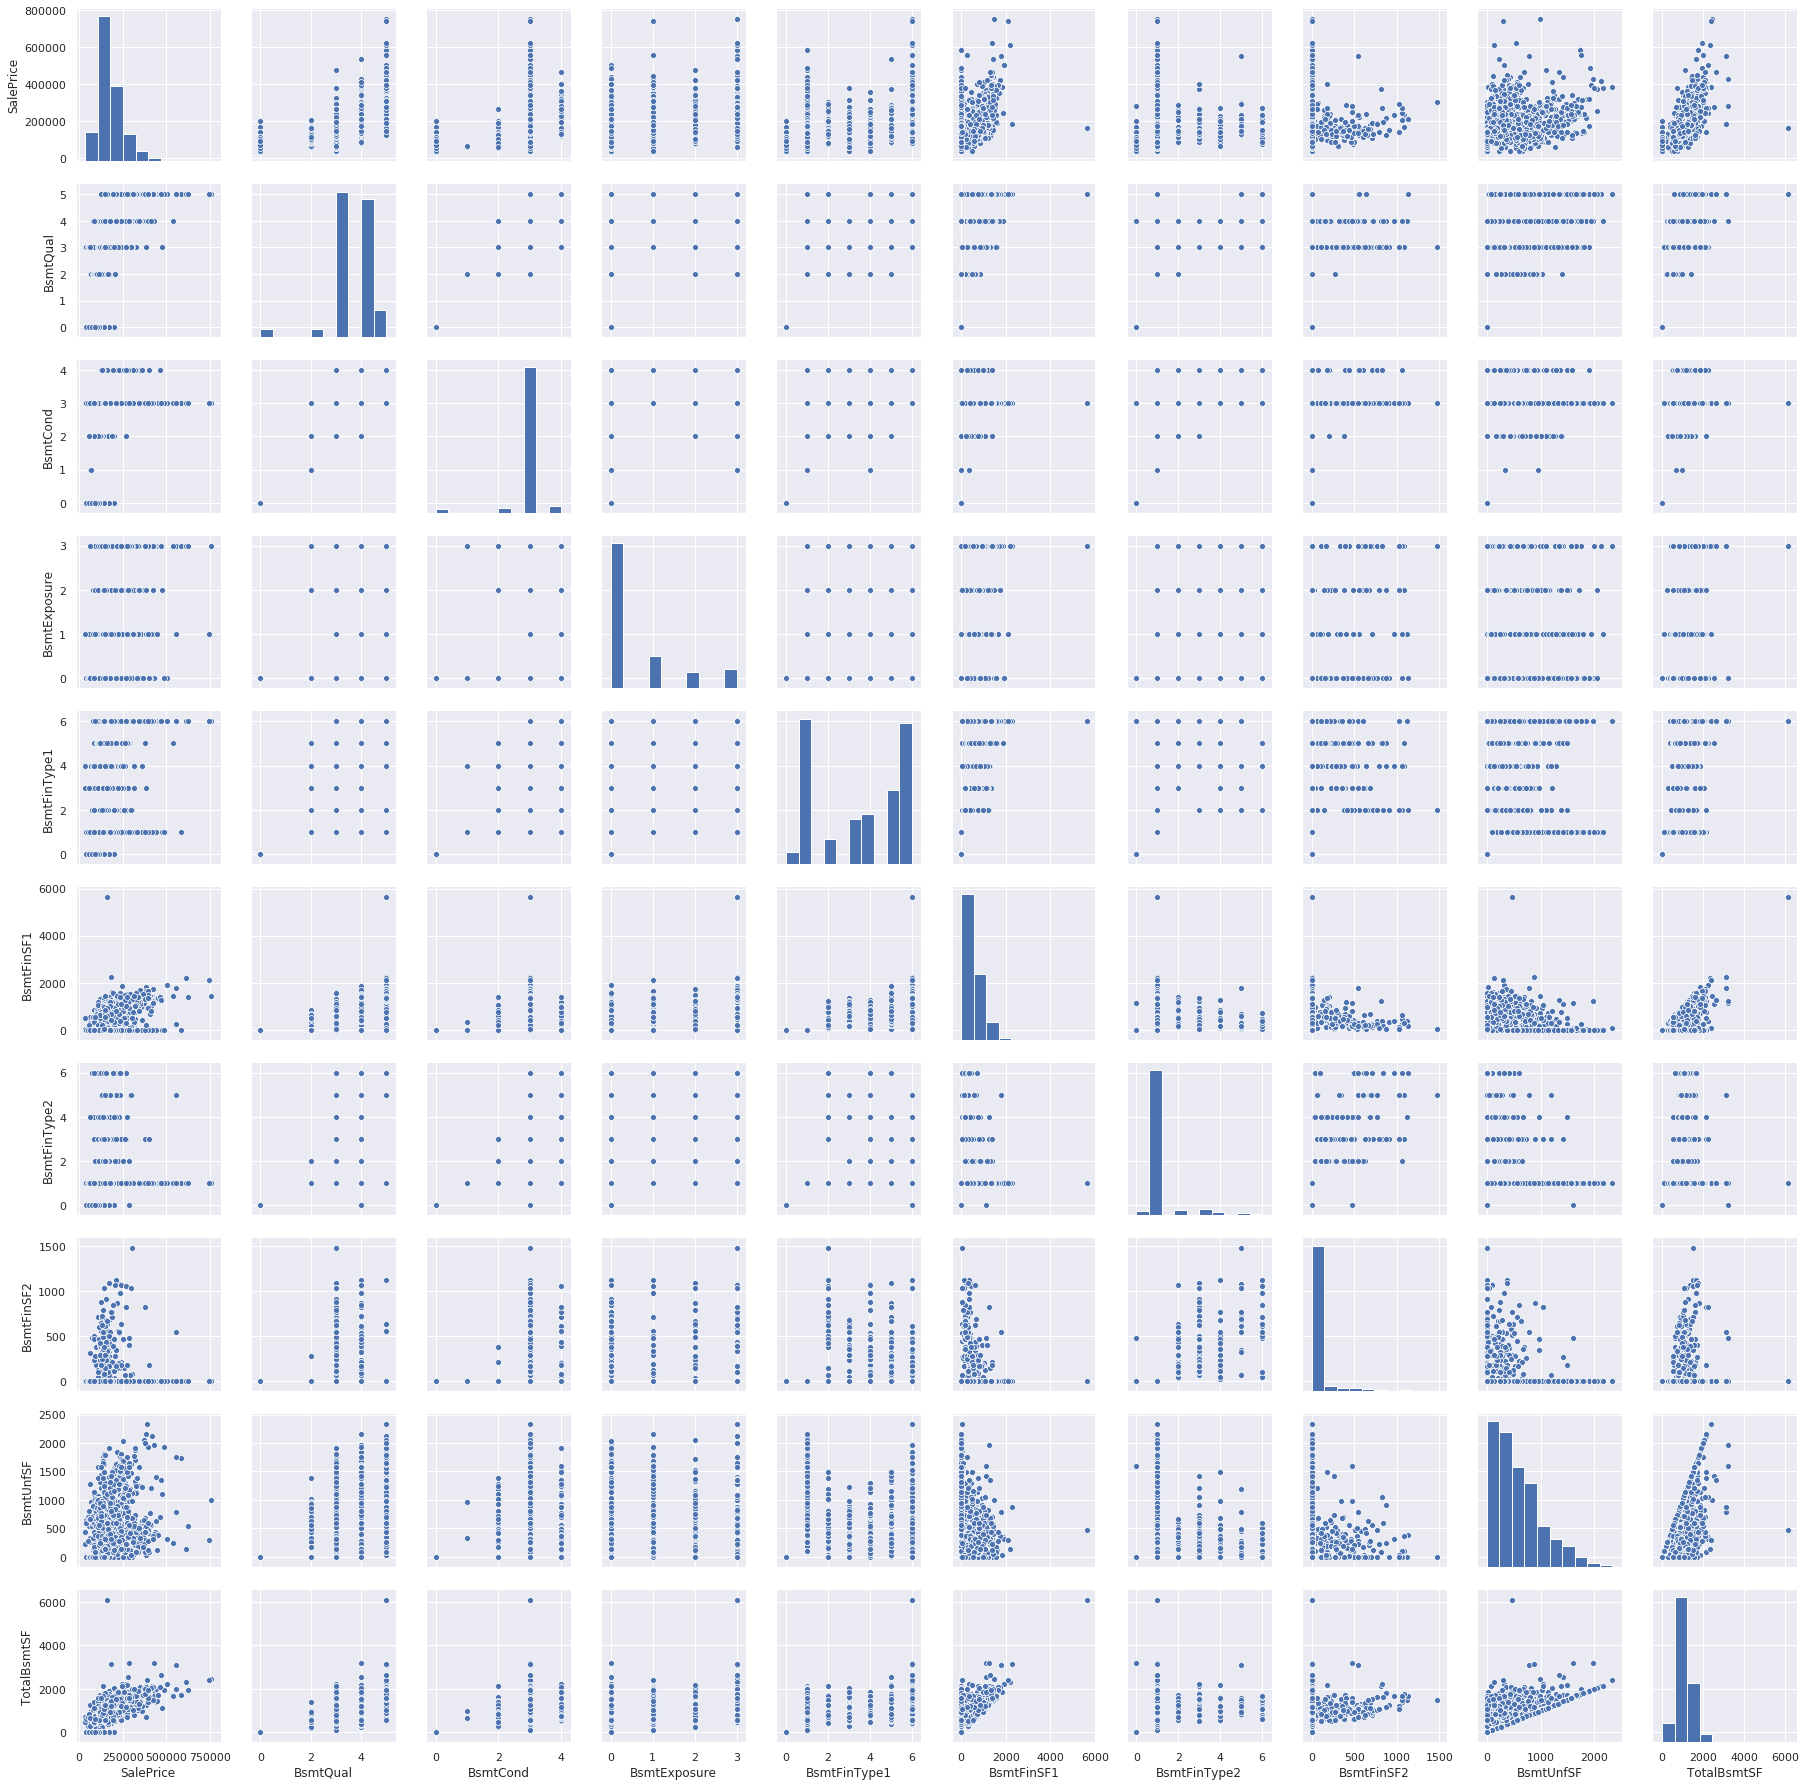

In [0]:
#scatterplot - Plotting for basement features
sns.set()
sns.pairplot(trainbsmt, height = 2.5)
plt.show();

The biggest Correlation from the basement features with Price is TotalBsmtSF and BsmtQual

In [0]:
trainbsmt[['BsmtQual', 'SalePrice']].groupby(['BsmtQual'], as_index=False).agg(['count', 'mean', 'median'])

SalePrice                   
             count       mean  median
BsmtQual                             
0               37 105652.892  101800
2               35 115692.029  112000
3              649 140759.818  135500
4              618 202688.479  192070
5              121 327041.041  318000

As the basement Quality increases, the mean price increases as well.

Average price of house with no Basement is $105652 and the one with Excellent Basement condition is 318000

## Misc Features like pool, fence and roof

In [0]:
train_roofpool = train[['YearBuilt', 'RoofStyle', 'RoofMatl', 'PoolArea', 'PoolQC', 'Fence','YrSold', 'SalePrice']]
train_roofpool.head()

,YearBuilt,RoofStyle,RoofMatl,PoolArea,PoolQC,Fence,YrSold,SalePrice
0,2003,Gable,CompShg,0,None,None,2008,208500
1,1976,Gable,CompShg,0,None,None,2007,181500
2,2001,Gable,CompShg,0,None,None,2008,223500
3,1915,Gable,CompShg,0,None,None,2006,140000
4,2000,Gable,CompShg,0,None,None,2008,250000


In [0]:
poolarea = train[[ 'PoolArea', 'SalePrice']]
poolarea

,PoolArea,SalePrice
0,0,208500
1,0,181500
2,0,223500
3,0,140000
4,0,250000
...,...,...
1455,0,175000
1456,0,210000
1457,0,266500
1458,0,142125


In [0]:
poolarea.sort_values(by=['PoolArea', 'SalePrice'])

,PoolArea,SalePrice
495,0,34900
916,0,35311
968,0,37900
533,0,39300
30,0,40000
...,...,...
1386,519,250000
1182,555,745000
1170,576,171000
810,648,181000


In [0]:
bins = [100,400,800,1200,1600]
poolarea = train_roofpool.groupby(pd.cut(train_roofpool['PoolArea'], bins=bins)).size()
poolarea

PoolArea
(100, 400]      0
(400, 800]      7
(800, 1200]     0
(1200, 1600]    0
dtype: int64

Only 7 hours has pool data, considering the total house data size, in this analysis we will discard all pool related feature for house price.

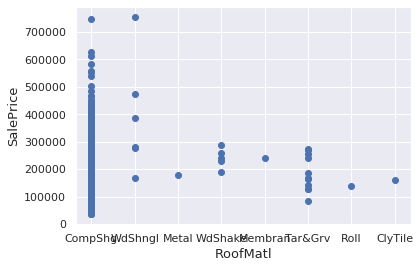

In [0]:
fig, ax = plt.subplots()
ax.scatter(x = train['RoofMatl'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('RoofMatl', fontsize=13)
plt.show()

For roof materials, only "CompShg " has significant amount of data and rest type has very limited data, we will discard this feature  for futher analysis.

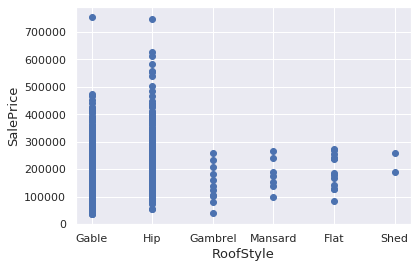

In [0]:
fig, ax = plt.subplots()
ax.scatter(x = train['RoofStyle'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('RoofStyle', fontsize=13)
plt.show()

From this plot, we can see that roofstyle "Gable" and "Hip" has more relation with house price and  also have more data to analyze.

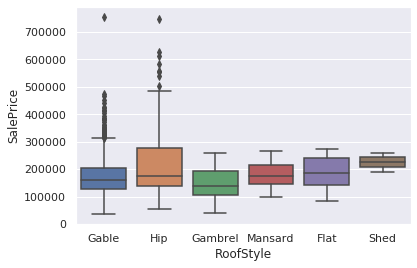

In [0]:
sns.boxplot(x='RoofStyle', y="SalePrice", data=train_roofpool)

In [0]:
train_roofpool[['RoofStyle', 'SalePrice']].groupby(['RoofStyle'], as_index=False).agg(['count', 'mean', 'median'])

SalePrice                   
              count       mean  median
RoofStyle                             
Flat             13 194690.000  185000
Gable          1141 171483.956  160000
Gambrel          11 148909.091  139000
Hip             286 218876.934  176500
Mansard           7 180568.429  175000
Shed              2 225000.000  225000

Text(0, 0.5, 'RoofStyle')

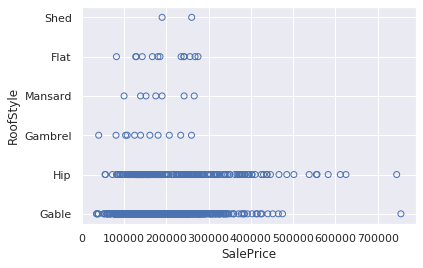

In [0]:
plt.scatter(train_roofpool.SalePrice, train_roofpool.RoofStyle,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1.0 )
plt.xlabel('SalePrice')
plt.ylabel('RoofStyle')

This indicates that only Gable and Hip roofstyle has significant amount of data, and Hip roof style has higher mean and median value comparing to Gable roof style.

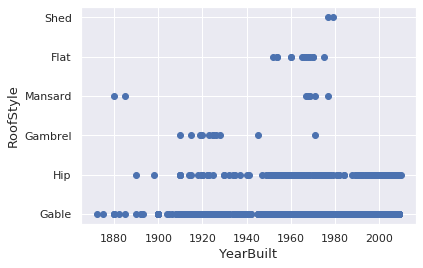

In [0]:
fig, ax = plt.subplots()
ax.scatter(x = train_roofpool['YearBuilt'], y = train['RoofStyle'])
plt.ylabel('RoofStyle', fontsize=13)
plt.xlabel('YearBuilt', fontsize=13)
plt.show()

Let's Plot if gable and hip roofstyle has more relation with built year, the plot shows they are not correlated.

In [0]:
train_roofpool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
YearBuilt    1460 non-null int64
RoofStyle    1460 non-null object
RoofMatl     1460 non-null object
PoolArea     1460 non-null int64
PoolQC       1460 non-null object
Fence        1460 non-null object
YrSold       1460 non-null int64
SalePrice    1460 non-null int64
dtypes: int64(4), object(4)
memory usage: 91.4+ KB


In [0]:
train_roofpool[['Fence','SalePrice']].groupby(['Fence'], as_index=False).agg(['count', 'mean', 'median'])

SalePrice                   
          count       mean  median
Fence                             
GdPrv        59 178927.458  167500
GdWo         54 140379.315  138750
MnPrv       157 148751.089  137450
MnWw         11 134286.364  130000
None       1179 187596.838  173000

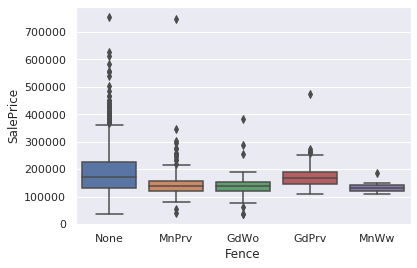

In [0]:
sns.boxplot(x='Fence', y="SalePrice", data=train_roofpool)

The calculation and plot shows that GdPrv fence house has higher price comparing to other fence, but considering the available data VS total data, this is not the significant feature,we will drop it for futher analysis.

##Neighbourhood


In [0]:
# in this code I created dataframe with two attributes 'Neighborhood' and 'SalePrice'
Cleandataneighbor = train[['Neighborhood', 'SalePrice']]
Cleandataneighbor.head(6)

,Neighborhood,SalePrice
0,CollgCr,208500
1,Veenker,181500
2,CollgCr,223500
3,Crawfor,140000
4,NoRidge,250000
5,Mitchel,143000


In [0]:
Cleandataneighbor.min()

Neighborhood    Blmngtn
SalePrice         34900
dtype: object

In [0]:
Cleandataneighbor.max()

Neighborhood    Veenker
SalePrice        755000
dtype: object

In [0]:
# list unique names of neighbourhoods 
neighbourhood  = Cleandataneighbor.Neighborhood.unique()
neighbourhood

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

<BarContainer object of 1460 artists>

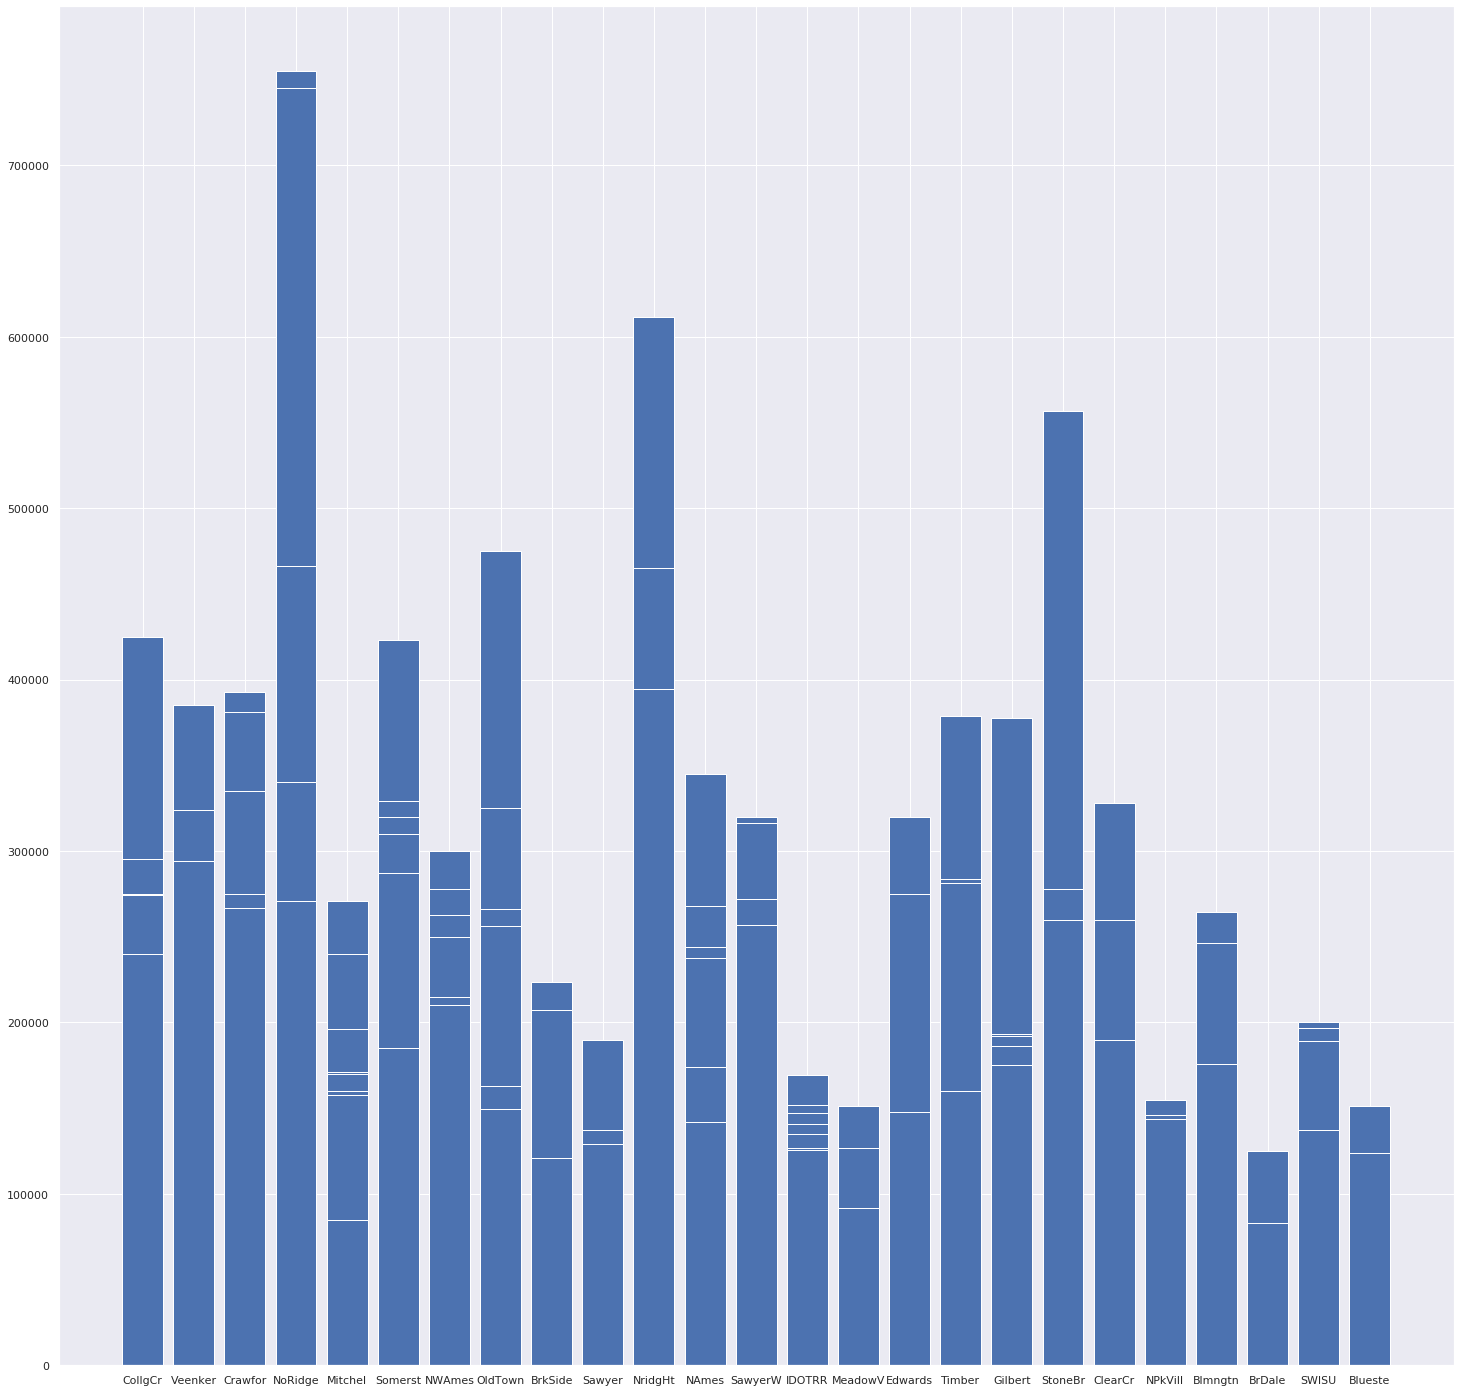

In [0]:
# This plot shows the categorical 'Neighborhood' converted to quantative values of each neighbourhood
# total numbers of neighbourhoods are 23
# highest saleprice was in 'Veenker' neighbourhood
# lowest saleprice was in 'BrDale' neighbourhood, when I calculate minimum value of slaeprice form 
# the 'Cleandataneighbor' dataframe its giving me 'Blmngtn' neighbourhood has minimum value but plot 
# is showing me 'BrDale' neighbourhood has minimum value
# ploted neighbourhood 0-25 against house salesprice
X = Cleandataneighbor['Neighborhood']#.astype("category").cat.codes 
Y = Cleandataneighbor['SalePrice']
plt.figure(figsize=(25,25))
plt.bar(X,Y)

In [0]:
# create a dataframe with neighbourhood categorical variables to numberical values
Cleandata1['Neighborhood'] =Cleandata1['Neighborhood'].astype("category").cat.codes
Cleandata1.head(4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,YearBuilt,Neighborhood,FullBath,HalfBath,BedroomAbvGr,GarageArea,YrSold,SalePrice
0,2003,5,2,1,3,548,2008,208500
1,1976,24,2,0,3,460,2007,181500
2,2001,5,2,1,3,608,2008,223500
3,1915,6,1,0,3,642,2006,140000


<BarContainer object of 1460 artists>

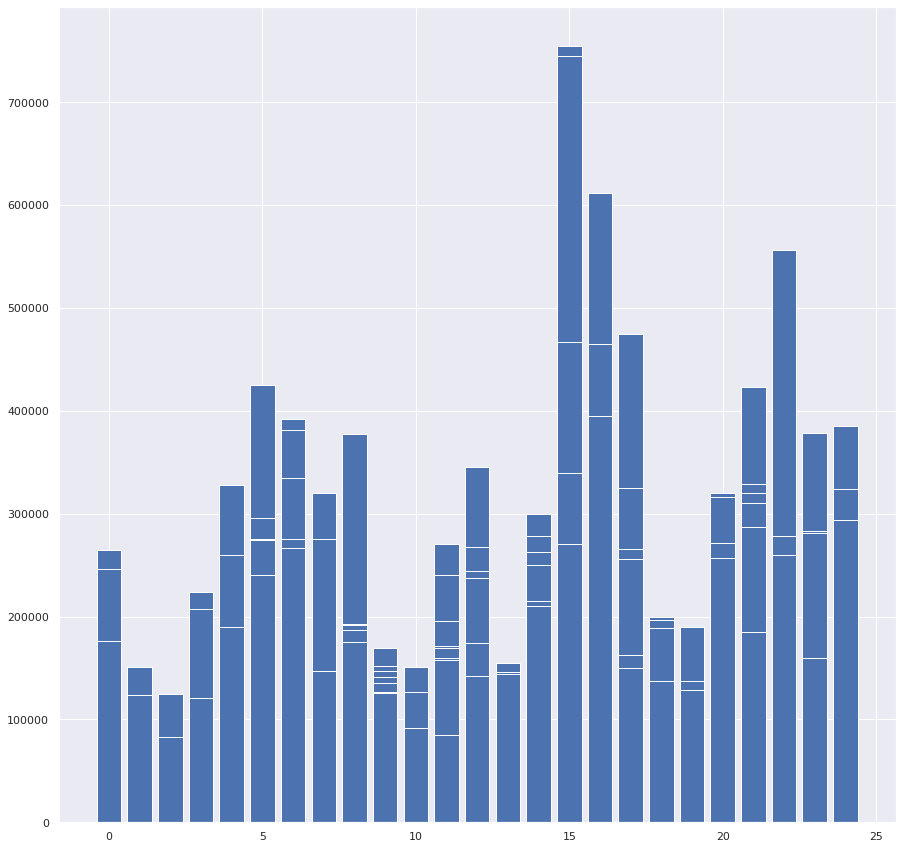

In [0]:
#@title
# create plot with neighbourhood by 0-23 numbers of neighbourhoods in the dataframe
X = Cleandataneighbor['Neighborhood'].astype("category").cat.codes 
Y = Cleandataneighbor['SalePrice']
plt.figure(figsize=(15,15))
plt.bar(X,Y)

In [0]:
# create dataframe with only two attrivutes 'Neighborhood' and 'SalePrice'
neighbourhoodadata = Cleandata1[[ 'Neighborhood', 'SalePrice']]
neighbourhoodadata .head(4)

,Neighborhood,SalePrice
0,5,208500
1,24,181500
2,5,223500
3,6,140000


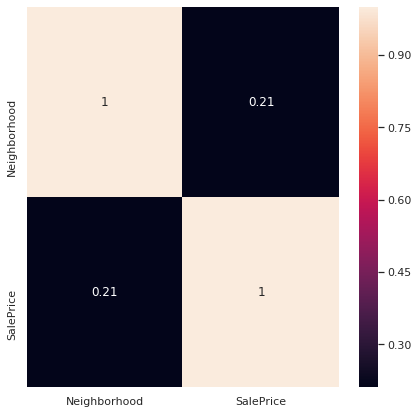

In [0]:
# correlation plot between neighbourhood types and sale price 
plt.figure(figsize=(7, 7))
sns.heatmap(neighbourhoodadata .corr(), annot=True)

# Summary of Analysis

##Sq. Footage and age of home

From the analysis, we can see that the square footage of the house and the age of the home (year it's built) had a positive corrlation with the Sale Price. 
It should be noted that newer house (which are built more recently), has a higher sale price per square feet compare to older houses. 


##Kitchen, Bedroom and Bathroom

As a result of the analysis, it was observed that the # of above grade bathrooms along with the above grade kitchen quality had a significant impact on Sales Price. Their correlation coefficients were 0.6 and 0.66 respectively. The total # of rooms above grade had a mild correlation with Sales Price but that was most likely due to the increase in # of bathrooms. 

The kitchen quality score had 4 categories. Houses with the lowest kitchen quality had a median price of 115, 000 while the houses with the highest kitchen quality had a median price of 316, 750. It was clear that the impact was large, although more details on how the kitchen quality categorization was made would have been helpful. It is currently unclear what criteria makes a kitchen high quality vs. low quality. 

## Garage
House sale price correlates with garage area and numbers of cars fit into the garage with the housing sale price. In correlation plot between a total square foot of garage area and house, value shows 0.62 which indicates that house value is correlated to how big is the garage areas. Also, a similar scenario to a garage area, garage types means how many cars fit into that garage if it is 0, 1, 2, or 3, and the year of house is built shows a high correlation between all three attributes too.  

## Neighbourhood
Neighbourhood variable datasets were analyzed against housing values. Bar plots indicate that the highest sale price is in ‘Veenker’ neighbourhood, and the lowest sale price is in ‘BrDale’ neighbourhood at year the house was built, and house was sold.  If this neighbourhood types impacted the sale price overall? The correlation plot indicating 0.21 correlation between types of neighbourhood and housing values which minor correlation between these two variables. 

##Basement
Based on analysis 
TotalBsmtSF and BsmtQual are highly corelated to the Sale Price.

As the basement Quality increases, the mean price increases as well.

Average price of house with no Basement is $$105,652 and the one with Excellent Basement condition is $318,000

##Misc. Features

1.For  RoofStyle,only Gable and Hip roofstyle has significant amount of data, and Hip roof style has higher mean and median value comparing to Gable roof style. but they are not corelated with  built year.

2.For roof materials, only "CompShg " has significant amount of data and rest type has very limited data, therefore we will discard this feature for futher analysis.

3.Only 7 hours has pool data, considering the total house data size, in this analysis we will discard all pool related feature for house price

4.The calculation and plot shows that GdPrv fence house has higher price comparing to other fence, but considering the available data VS total data,this is not the significant feature,for avoiding the bias, we will drop it for futher analysis.

5.Overall, for Misc.features, we may just need to consider RoofStyle as one of feature as significant.

# Model

Features Considered:
- Quality of home
- Total Living Area
- Garage Cars 
- Age of Home

In [0]:
# Preparing Dependent and independent dataset
dataset = train[["OverallQual", "GrLivArea", "GarageCars", "YearBuilt", "SalePrice"]]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
OverallQual    1460 non-null int64
GrLivArea      1460 non-null int64
GarageCars     1460 non-null int64
YearBuilt      1460 non-null int64
SalePrice      1460 non-null int64
dtypes: int64(5)
memory usage: 57.2 KB


In [0]:
dataset.head()

,OverallQual,GrLivArea,GarageCars,YearBuilt,SalePrice
0,7,1710,2,2003,208500
1,6,1262,2,1976,181500
2,7,1786,2,2001,223500
3,7,1717,3,1915,140000
4,8,2198,3,2000,250000


In [0]:
#Preparing Dependent and Independent Variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [0]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [0]:
print(regressor.coef_)
print(regressor.intercept_)

[21333.73712311    61.59345143 15877.46680034   391.32491487]
-842149.6434662094


In [0]:
from sklearn import metrics
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSE

43391.923227721665

In [0]:
np.subtract(y_test, y_pred).astype(int)

array([ -37714,  -25486,   -7577,  -45132,  -52291,   -5775,   31207,
         -3417,  269403,  -42232,    1686,  -36104,  -18339,   17433,
        -11475,   17846,  -46904,   39135,   23971,  -29920,   20552,
         -9554,   -4705,  -15129,  -20632,  -36044,  -19644,   31600,
         32538,    1296,  -77755,  -15180,    8178,  -44184,   84546,
        -34090,   15137,   -9792,   11258,   22924,   29390,  -15081,
        -39245,    6546,   74062,  -36392,   12871,   19480,  -22810,
          7037,   66858,   24682,   -5522,   48717,   56453,   -8706,
            93,  -31788,    5508,   23705,  -13198,   24622,   12101,
         44708,   -7824,  -17965,   29013,   -4829,   18303,   -4506,
        -22858,   12488,    6383,  158934,   28375,  -13633,   24792,
        -13743,   44809,    7512,   11251,   28846,   12583,    7446,
        -15614,  -20115,   11354,   -5142,    7569,    1534,   -2575,
          2186,   -3067,  -36999,  -44801,   11096,   -1561,   13723,
         25432,   14

# Results & Recommendations

The RMSE seems to be high. We can look at optimizing the model going forward to reduce RMSE value.

We used Linear regression model which may not be the best model type considering the complexity of data. We may use some other types of models like XGBoost to improve model performance